In [18]:
import  numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten



In [19]:
X_train=np.loadtxt('input.csv',delimiter=',')
Y_train=np.loadtxt('labels.csv',delimiter=',')

X_test=np.loadtxt('input_test.csv',delimiter=',')
Y_test=np.loadtxt('labels_test.csv',delimiter=',')

X_train=X_train/255.0
X_test=X_test/255.0

In [20]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)
X_test=X_test.reshape(len(X_test),100,100,3)

In [21]:
print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_test: ",Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400,)


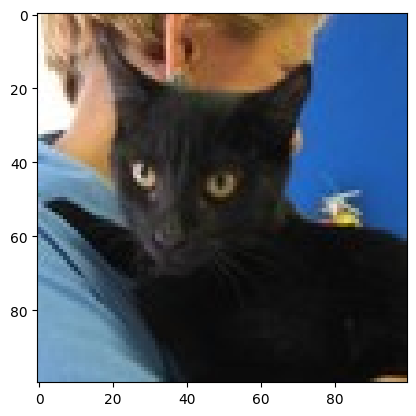

In [22]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx, :])
plt.show()


In [23]:
#Load Dataset
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

In [24]:
#Model
model=Sequential([
    Conv2D(32, (3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1, activation='sigmoid')
])


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [27]:
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.8309 - loss: 0.3781
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.8711 - loss: 0.3090
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.8903 - loss: 0.2623
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.9178 - loss: 0.2169
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9538 - loss: 0.1424


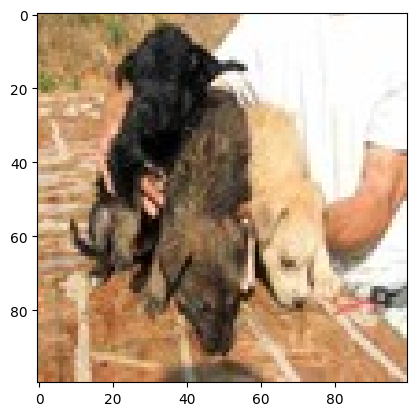

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Our model says it is a : cat


In [41]:
idx2= random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()
y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred=y_pred>0.5

if(y_pred==0):
    pred='dog'
else:
    pred='cat'

print("Our model says it is a :",pred)
